# Logging Metrics

In [1]:
from mlflow_for_ml_dev.experiments.exp_utils import get_or_create_experiment
import matplotlib.pyplot as plt
import mlflow

In [2]:
# creating experiments
experiment_name = "logging_function"
tags = {
    "project_name":"UNDEFINED",
    "topic":"run_management",
    "mlflow.note.content":"This experiment is used to test the logging function."
}

experiment = get_or_create_experiment(experiment_name, tags)

Experiment with name logging_function and ID 334926439439515466 created.


In [5]:
# logging metrics
with mlflow.start_run(run_name="logging_metrics", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a single metric
    mlflow.log_metric("m1", 2.0)

    # logging multiple metrics as a dictionary
    mlflow.log_metrics({"m2": 3.0, "m3": 4.0})

Run ID: ef97c5483b874a018c834926145cbca6


### Using `step` parameter when logging metrics

In [6]:
# Training a deep learning model 
import random
epochs = 100
batch_size = 32
# simulate training loop
# in this case we are providing the run_id and experiment_id
# this is useful when we want to log metrics to an existing run
with mlflow.start_run(run_id=run.info.run_id, experiment_id=experiment.experiment_id) as run:
    
    # simulate training loop
    for epoch in range(1,epochs+1):
        acc = 1 - 2 ** -epoch - random.random() / epoch
        loss = 2 ** -epoch + random.random() / epoch

        # In this case every step represents an epoch
        # since we have defined 100 epochs, we will have 100 steps
        mlflow.log_metric("accuracy", acc, step=epoch)
        mlflow.log_metric("loss",loss, step = epoch)

    # logging a single metric
    mlflow.log_metric("m1", 4.0, step=1)

    # logging multiple metrics
    mlflow.log_metrics({"m2": 4.0, "m3": 7.0}, step=1)

In [8]:
client = mlflow.MlflowClient()

In [9]:
# use the client to get the metric history
metric_history = client.get_metric_history(run_id = run.info.run_id, key="accuracy")

In [11]:
len(metric_history)

100

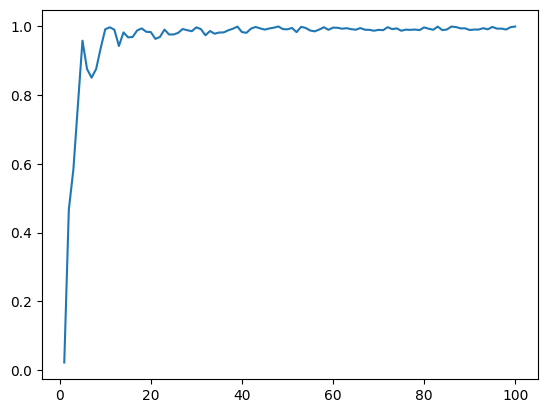

In [12]:
metric_value = [m.value for m in metric_history]
plt.plot(range(1,epochs+1), metric_value)

In [ ]:
# use the client to get the metric history
metric_history = client.get_metric_history(run_id = run.info.run_id, key = "m1")
metric_history

# Logging Parameters

In [13]:
with mlflow.start_run(run_name="logging_params", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a single parameter
    mlflow.log_param("p1", 2.0)

    # logging multiple parameters
    mlflow.log_params({"p2": 3.0, "p3": 4.0, "p4":"This is a parameter."})

Run ID: 441097d4b5d74c36b7807fcc480e1904


# Logging Dict

In [14]:
with mlflow.start_run(run_name="logging_dict", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a dictionary as json
    mlflow.log_dict(dictionary={"m1": 2.0, "m2": 3.0, "m3": 4.0}, artifact_file="files/metrics.json")

    # logging a dictionary as yaml 
    config = {
        "dev":{
            "epochs": 100,
            "batch_size": 32
        },
        "test":{
            "epochs": 50,
            "batch_size": 16
        },
        "prod":{
            "epochs": 10,
            "batch_size": 8
        }
    }
    mlflow.log_dict(dictionary=config, artifact_file="files/config.yaml")
    mlflow.log_dict(dictionary=config, artifact_file="files/config.json")


Run ID: 104c63636ae74c8ab98abc237b80c536


# Logging Artifacts

In [18]:
#Log a single artifact (file)
with mlflow.start_run(run_name="logging_artifact", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an artifact
    mlflow.log_artifact(local_path="./images/mlflow_run.jpeg",artifact_path="images")

Run ID: 3c75440b5d014dde95ceeb1dc0129e44


In [19]:
with mlflow.start_run(run_name="logging_artifacts", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging artifacts
    mlflow.log_artifacts(local_dir="./images",artifact_path="images")

Run ID: aee17e1a1ea442ca99793390313de8cf


# Logging Figure

Log a figure as an artifact. The following figure objects are supported:

* matplotlib.figure.Figure

* plotly.graph_objects.Figure

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1], [2, 3])

with mlflow.start_run(run_name="logging_figure", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging a figure
    mlflow.log_figure(fig, artifact_file="figures/figure.png")

# Logging Image

Log an image as an artifact. The following image objects are supported:

* numpy.ndarray

* PIL.Image.Image

In [ ]:
import numpy as np

image = np.random.randint(0, 256, size=(100, 100, 3), dtype=np.uint8)

with mlflow.start_run(run_name="logging_image", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # logging an image
    mlflow.log_image(image, artifact_file="image.png")

# Logging Table

Log a table to MLflow Tracking as a JSON artifact. If the artifact_file already exists in the run, the data would be appended to the existing artifact_file.

* data – Dictionary or pandas.DataFrame to log.

* artifact_file – The run-relative artifact file path in posixpath format to which the table is saved (e.g. “dir/file.json”).

In [ ]:
import mlflow

table_dict = {
    "inputs": ["What is MLflow?", "What is Databricks?"],
    "outputs": ["MLflow is ...", "Databricks is ..."],
    "toxicity": [0.0, 0.0],
}

with mlflow.start_run(run_name="logging_table", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # Log the dictionary as a table
    mlflow.log_table(data=table_dict, artifact_file="results.json")

In [ ]:
# Appending more info

table_dict = {
    "inputs": ["This is a new input"],
    "outputs": ["This is a new output"],
    "toxicity": [10.0],
    "new_column": ["This is a new column."],
}

with mlflow.start_run(run_id=run.info.run_id, experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # Log the dictionary as a table
    mlflow.log_table(data=table_dict, artifact_file="results.json")

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "inputs": ["What is MLflow?", "What is Databricks?"],
    "outputs": ["MLflow is ...", "Databricks is ..."],
    "toxicity": [0.0, 0.0],
})

with mlflow.start_run(run_name="logging_dataframe", experiment_id=experiment.experiment_id) as run:
    print("Run ID:", run.info.run_id)

    # Log the dictionary as a table
    mlflow.log_table(data=df, artifact_file="results.json")

# Logging Text

Log text as an artifact.

In [ ]:
with mlflow.start_run(run_name="logging_text", experiment_id=experiment.experiment_id) as run:

    print("Run ID:", run.info.run_id)
    # Log text to a file under the run's root artifact directory
    mlflow.log_text(text = "simple string",artifact_file= "file1.txt")

    # Log text in a subdirectory of the run's root artifact directory
    mlflow.log_text(text = "another simple string", artifact_file= "dir/file2.txt")

    # Log HTML text
    mlflow.log_text(text = "<h1>header</h1>", artifact_file= "index.html")

    mlflow.log_text(text = "<h1>header</h1>", artifact_file= "index.txt")